In [1]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier ## model
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import pandas as pd
import numpy as np
import seaborn as sns

## load data
df_train = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv').drop('id', axis=1)

## split features 
X = df_train.iloc[:, 0:10]
y = df_train.iloc[:, 11]

## train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=102, 
    stratify=y,
)

## pipeline
num_cols = X_train.select_dtypes(exclude=['object']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

num_pipe = Pipeline(
    steps=[('scaler', StandardScaler())
     
    ]
)

cat_pipe = Pipeline(
    steps=[('encoder', OneHotEncoder())
     
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', num_pipe, num_cols),
        ('categorical', cat_pipe, cat_cols)
    ]
)

# combine_all = Pipeline(
#     steps=[
#         ('preprocessor', preprocessor),
#         ('modelo', AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=102))
#     ]
# )

# combine_all

In [2]:
# ## Train Score
# scores = cross_val_score(
#     combine_all,
#     X_train,
#     y_train, cv=10, scoring='roc_auc', verbose=4
# )

# print(f'Roc: {np.mean(scores):.3f} 'f'+/- {np.std(scores):.3f}')

In [3]:
# ## Test Score
# scores = cross_val_score(
#     combine_all,
#     X_test,
#     y_test, cv=10, scoring='roc_auc', verbose=4
# )

# print(f'Roc: {np.mean(scores):.3f} 'f'+/- {np.std(scores):.3f}')

In [4]:
estimator = [
    
    MLPClassifier(max_iter = 10000), 
    LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 200),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    RandomForestClassifier(),
    SVC(gamma ='auto', probability = True),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    CatBoostClassifier(logging_level='Silent')
]

mini_estimator = [XGBClassifier(), GradientBoostingClassifier(), CatBoostClassifier()]

scores_train = {}

# for model in mini_estimator:
#     combine_all = Pipeline(
#         steps=[
#             ('preprocessor', preprocessor),
#             ('modelo', model)
#         ]
#     )
    
#     ## Train Score
#     scores = cross_val_score(
#         combine_all,
#         X_train,
#         y_train, cv=10, scoring='roc_auc', verbose=0)
    
#     scores_train[model.__class__.__name__] = np.mean(scores)
    
# print(scores_train)


## Submit

In [5]:
combine_all = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('modelo', XGBClassifier())
        ]
)
    
combine_all.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['person_home_ownership', 'loan_inten...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [6]:
df_test = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv').drop('id', axis=1)
sample = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')

sample['loan_status'] = combine_all.predict_proba(df_test)[:, 1]
sample.to_csv('#2.csv', index=False)
sample.head()

,id,loan_status
0,58645,0.998255
1,58646,0.014269
2,58647,0.663288
3,58648,0.004878
4,58649,0.032427


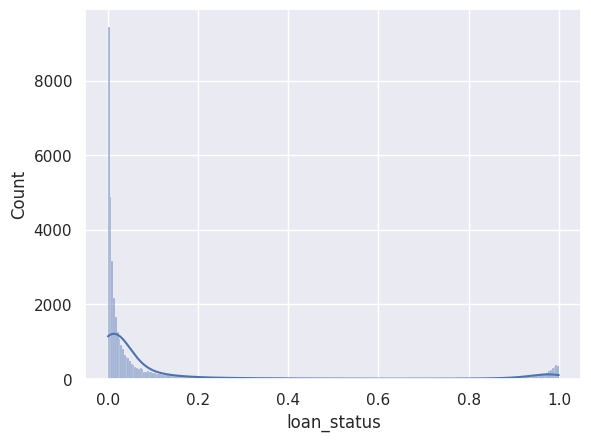

In [7]:
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="darkgrid")
sns.histplot(data=sample, x="loan_status", kde=True);